E-commerce is a huge business sector that allows customers to access a variety of goods and services with a few clicks. Many popular shopping platforms such as Amazon or Alibaba process millions of transactions annually. In recent years, due to the corona disease, online shopping has increased dramatically, therefore, the online shopping market has become very competitive and it is important for strong and innovative online shopping platforms.   
One possible way to increase online shopping transactions is to understand and respond to customers' behavior. According to sufficient online shopping data and machine learning techniques, it is possible to determine the purchase intention of website visitors, so in this exercise, we want to use machine learning algorithms in Marketing Analytics, which is one of the topics discussed in recent years. let's get to know each other more.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

## Dataset

Before doing anything, we need to get familiar with Dataset. The desired dataset is located in the `customers_intention.csv` file. This dataset contains various information related to customer behavior on online shopping websites, which helps us to perform marketing analysis and understand related KPIs and metrics. This dataset contains feature vectors belonging to 12330 sessions, in the sense that each row shows the behavior of a customer to buy a product and has a total of 10 numerical features and 8 categorical features. 
Use the "Revenue" property as the class label.

in this section, what you have to do is as follows:
 - lead the dataset
 - print information of the dataset
 - plot number of data for each label in `Revenue` column.

In [2]:
# Load dataset
df = pd.read_csv('Customers_intention.csv')

In [3]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

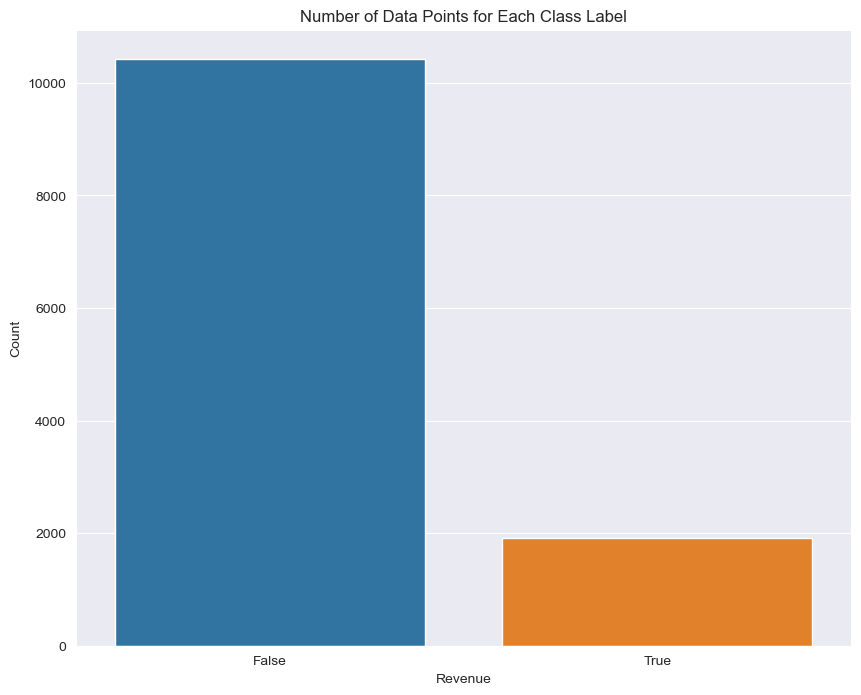

In [4]:
# plot number of data for each class label
plt.figure(figsize=(10, 8))
sns.countplot(x='Revenue', data=df)
plt.title('Number of Data Points for Each Class Label')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

## Data Cleaning

Now, after reading the data, it is time to clean the data. At this stage, we need to do the necessary pre-processing to clean the dataset. Some of the things we suggest you do are as follows:
- Identification of null values
- Handling the null values of each column in an appropriate way
- one-hot encoding of categorical columns. you can use this [link](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) for one-hot encoding
And any pre-processing you want.

In [5]:
# identify and handle nan values
df = df.dropna()  # as we saw previously there is no null value

In [6]:
# categorical encoding and one hot encoding
categorical_features = df.select_dtypes(include=['object', 'bool']).columns.tolist()
# OperatingSystem, Browser, Region, TrafficType are categorical too but they have numerical values. Actually they have been label encoded

df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True, dtype=int)

df_encoded = df_encoded.rename(columns={'Revenue_True': 'Revenue', 'Weekend_True': 'Weekend'})

df_encoded

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,1,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,1,0,0,0,1,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,1,0,0,0,1,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,1,0,0,0,1,0,0


## Train/Test Split
- Divide the data into two parts, train and test. Assign `80%` of the data to the train section.
    - split in a `stratified` fashion. (Hint: you need to change a parameter in the corresponding method)

In [7]:
# import train test split from sklearn
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import StandardScaler

x = df_encoded.drop('Revenue', axis='columns')  # or df_encoded.drop(columns=['Revenue'])
y = df_encoded['Revenue']

# Standardizing data
sc = StandardScaler()
x_standard = sc.fit_transform(x)

In [9]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x_standard, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training set shape: {x_train.shape}, {y_train.shape}")
print(f"Testing set shape: {x_test.shape}, {y_test.shape}")

Training set shape: (9864, 26), (9864,)
Testing set shape: (2466, 26), (2466,)


## Classification Using Regression

- Assign +1 to every instance of customer visit that led to a purchase and assign -1 to every visit that did not lead to a purchase.
- Using a regression model (univariate, multivariate, linear, polynomial, etc.), predict whether a cutomer's visit will lead to a purchase or not.
- How do you decide whether a visit will lead to a purchase based on the output of the model which is a real-valued number? 

In [10]:
y_train_scaled = y_train.apply(lambda x: 1 if x else -1)
y_test_scaled = y_test.apply(lambda x: 1 if x else -1)

print(y_train_scaled.head())
print(y_test_scaled.head())

4263   -1
5905   -1
9434   -1
3505    1
2067    1
Name: Revenue, dtype: int64
4722   -1
6835   -1
5524    1
663    -1
136    -1
Name: Revenue, dtype: int64


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

degree = 2
poly = PolynomialFeatures(degree=degree)
# Transforming features. our model is polynomial due to inputs (x); so we only need to transform x.
# there is no need to transform y
# example: y = ax^2 + bx + c 
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

alpha = 1.0  # The alpha parameter in Ridge Regression is a regularization parameter that controls the strength of the L2 regularization term.
model = Ridge(alpha=alpha)

# model = LinearRegression()

model.fit(x_train_poly, y_train_scaled)

y_pred = model.predict(x_test_poly)

In [12]:
# How do you decide whether a visit will lead to a purchase based on the output of the model which is a real-valued number?
# Thresholding to get binary classification
threshold = 0
y_pred_class = np.where(y_pred >= threshold, 1, -1)

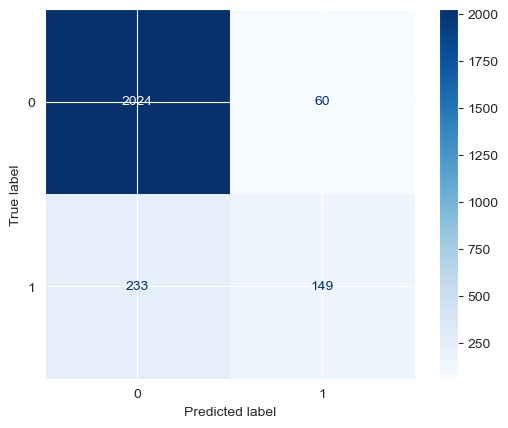

              precision    recall  f1-score   support

          -1       0.90      0.97      0.93      2084
           1       0.71      0.39      0.50       382

    accuracy                           0.88      2466
   macro avg       0.80      0.68      0.72      2466
weighted avg       0.87      0.88      0.87      2466

Precision: 0.7129186602870813
Accuracy: 0.8811841038118411
Recall: 0.3900523560209424
F1 Score: 0.5042301184433164


In [13]:
cm = confusion_matrix(y_test_scaled, y_pred_class)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test_scaled, y_pred_class))

precision = precision_score(y_test_scaled, y_pred_class)
accuracy = accuracy_score(y_test_scaled, y_pred_class)
recall = recall_score(y_test_scaled, y_pred_class)
f1 = f1_score(y_test_scaled, y_pred_class)
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

In [ ]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Predicted_Class': y_pred_class})
predictions

## Dimensionality Reduction
Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension. Working in high-dimensional spaces can be undesirable for many reasons; raw data are often sparse as a consequence of the curse of dimensionality, and analyzing the data is usually computationally intractable (hard to control or deal with).


in this section you ar goinig to:
- plot datapoints in 2 dimensions using PCA
- Choose the best number of dimensions for PCA by plotting [cumulative explained variance ratio](https://medium.com/@megha.natarajan/understanding-cumulative-explained-variance-in-pca-with-python-653e3592a77c#:~:text=The%20Cumulative%20Explained%20Variance%20plot%20is%20a%20graphical%20representation%20that,the%20variance%20in%20the%20data.)
- Apply pca to the dataset with the number of dimensions you obtained in the previous section

*`don't remember you to standardize data before PCA transformation!`*

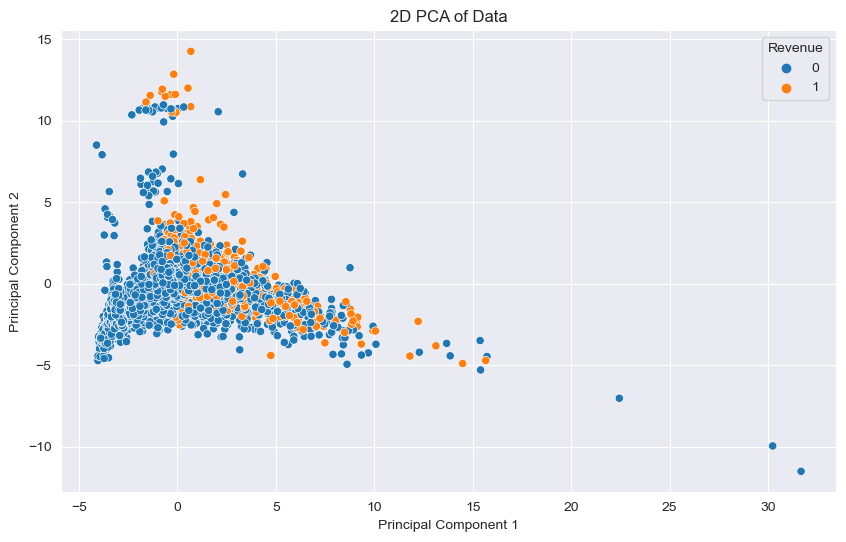

In [15]:
# plot datapoints in 2 dimensions using PCA
from sklearn.decomposition import PCA

# Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_standard)

# Plot the data points in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y)
plt.title('2D PCA of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

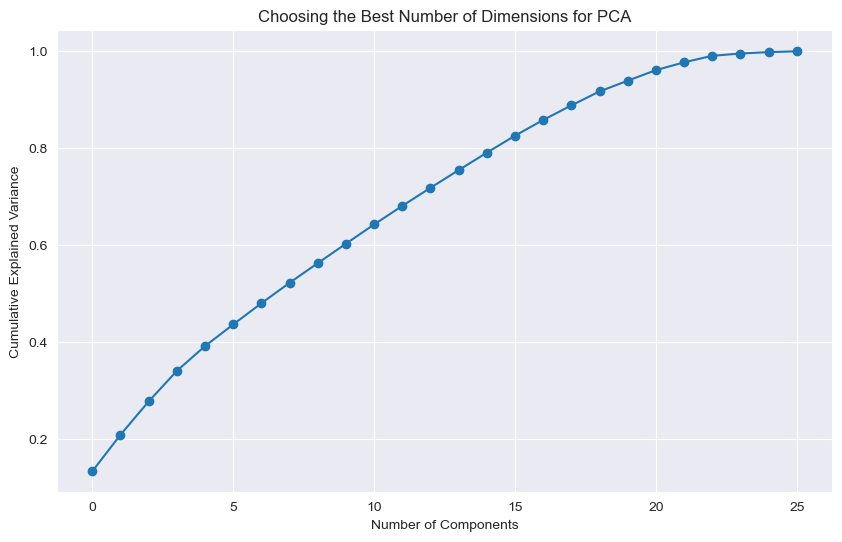

Number of optimal components: 20


In [16]:
# Choose the best number of dimensions for PCA

# Fit PCA to find the best number of dimensions
pca_full = PCA().fit(x_standard)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing the Best Number of Dimensions for PCA')
plt.grid(True)
plt.show()

optimal_components = np.argmax(cumulative_variance >= 0.95)
print(f'Number of optimal components: {optimal_components}')

In [17]:
# Apply pca
pca_optimal = PCA(n_components=optimal_components)
x_pca_optimal = pca_optimal.fit_transform(x_standard)

## Over-Sampling

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

in this section you are going to use `SMOTE` method for over-sampling data to get equal number of data for each data. After applying SMOTE plot number of data for each class again to see the diffrence.
- [over-smapling](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

In [18]:
# import  imblearn library for SMOTE
from imblearn.over_sampling import SMOTE

In [19]:
# Train and Test Split again based on x_pca_optimal
x_train, x_test, y_train, y_test = train_test_split(x_pca_optimal, y, test_size=0.2, stratify=y, random_state=42)

In [20]:
# Apply SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
x_test_smote, y_test_smote = smote.fit_resample(x_test, y_test)

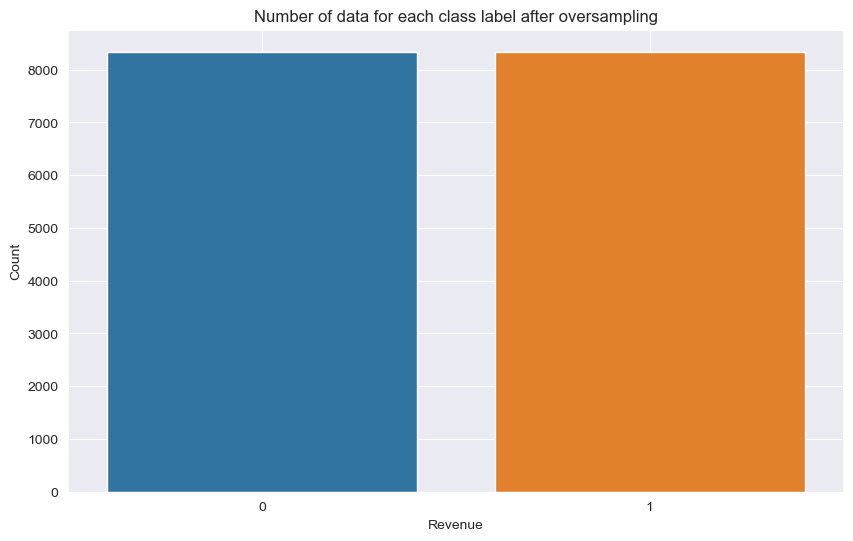

In [21]:
# plot number of data for each class
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_smote)
plt.title('Number of data for each class label after oversampling')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Training Classifiers

Classification is the process of predicting the class of given data points. Classes are sometimes called as targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).

in this section you are going to train several cllassifiers like:
- `SVM`
- `KNN`
- `Logistic Regression`
- `Decision Tree`

Use the dimensionally reduced `train` data to train the specified classifiers. 
- for each classifier use `gridsearch` to find best hyper parameters.
    - use `cross validation` for grid search
- after finding best parameters for each classifier, use them to train a classifier with founded parameters.
    - again train your best classifiers with `cross valdiation`
- use a bar plot to show each classifier's `accuracy`, `precision`, `f1` and `roc_auc`.

In [22]:
# Import Necessary libraries
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score

In [23]:
# Train classifiers
param_grids = {
    'SVM': {
        'kernel': ['linear', 'rbf'],
        'C': [1, 10]
    },
    'KNN': {
        'n_neighbors': [5, 10, 15]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10]
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30]
    }
}

# Initialize classifiers
classifiers = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=10000),
    'DecisionTree': DecisionTreeClassifier()
}



In [24]:
# Perform GridSearchCV for each classifier to find best params
best_params = {}
for clf_name, clf in classifiers.items():
    grid_search = GridSearchCV(clf, param_grids[clf_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train_smote, y_train_smote)
    best_params[clf_name] = grid_search.best_params_
    print(f"Best parameters for {clf_name}: {grid_search.best_params_}")
    

# Scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Evaluate each classifier with the best parameters using cross-validation
results = {}
for clf_name, clf in classifiers.items():
    clf.set_params(**best_params[clf_name])
    scores = cross_validate(clf, x_train_smote, y_train_smote, cv=5, scoring=scoring)
    results[clf_name] = scores
    print(f"Results for {clf_name}: {scores}")

Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best parameters for KNN: {'n_neighbors': 5}
Best parameters for LogisticRegression: {'C': 10}
Best parameters for DecisionTree: {'max_depth': 30}
Results for SVM: {'fit_time': array([3.81439042, 4.01031041, 3.92948937, 4.09841442, 3.87482119]), 'score_time': array([2.32703376, 2.39760804, 2.36370659, 2.42042136, 2.34884262]), 'test_accuracy': array([0.88699041, 0.90884558, 0.89325337, 0.89745127, 0.90434783]), 'test_precision': array([0.89144936, 0.8959907 , 0.87393041, 0.87457627, 0.87618516]), 'test_f1': array([0.88634308, 0.91027155, 0.89590643, 0.90052356, 0.90783011]), 'test_roc_auc': array([0.9477569 , 0.96038958, 0.95288928, 0.9534122 , 0.95535749])}
Results for KNN: {'fit_time': array([0.00299215, 0.00398946, 0.00398922, 0.00299215, 0.00299215]), 'score_time': array([0.31415844, 0.32213831, 0.32213831, 0.30917287, 0.30717802]), 'test_accuracy': array([0.88399281, 0.88665667, 0.88395802, 0.88515742, 0.88335832]), 'test_precisio

                            Classifier  accuracy  precision        f1  \
SVM                                SVM  0.898178   0.882426  0.900175   
KNN                                KNN  0.884625   0.827631  0.893859   
LogisticRegression  LogisticRegression  0.830295   0.866706  0.821426   
DecisionTree              DecisionTree  0.866815   0.846602  0.870567   

                     roc_auc  
SVM                 0.953961  
KNN                 0.951298  
LogisticRegression  0.914919  
DecisionTree        0.866814  


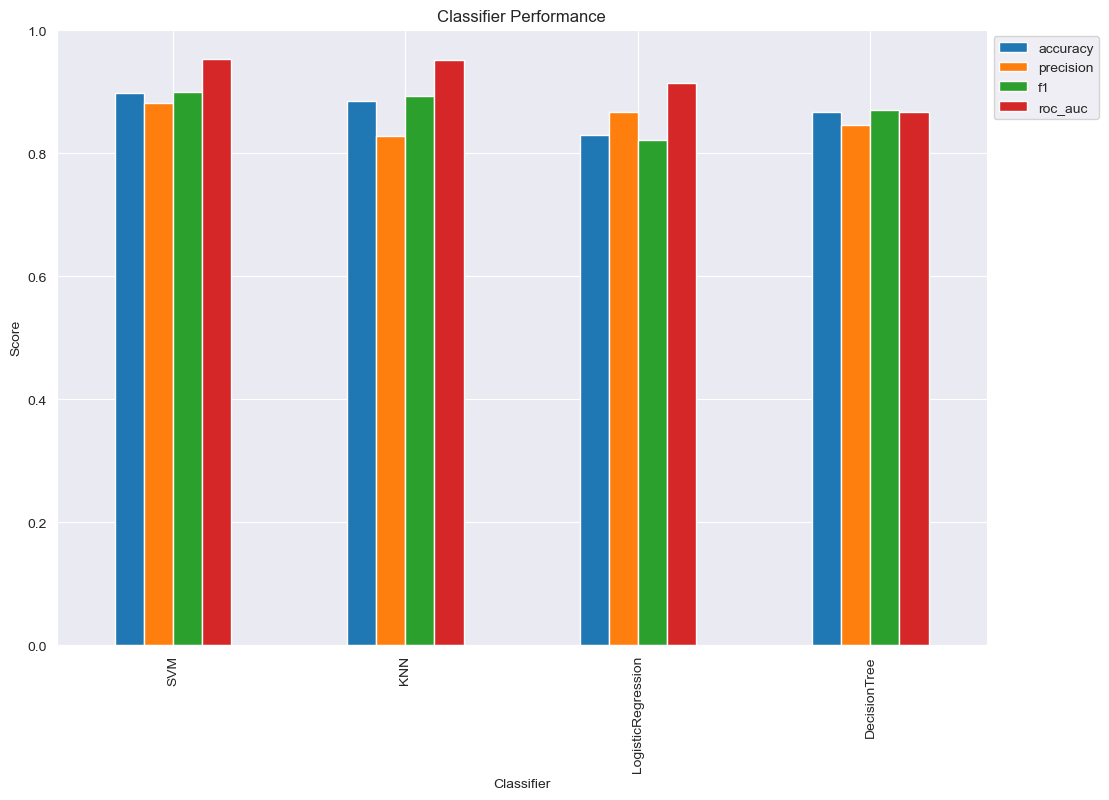

In [25]:
# bar plot for scores
mean_scores = {clf: {metric: np.mean(results[clf][f'test_{metric}']) for metric in scoring} for clf in classifiers}

# Convert mean scores to DataFrame for easier plotting
mean_scores_df = pd.DataFrame(mean_scores).T

# Adding name of the classifier as a column
mean_scores_df['Classifier'] = mean_scores_df.index
# Reorder columns so 'Classifier' comes first
cols = ['Classifier'] + [col for col in mean_scores_df if col != 'Classifier']
mean_scores_df = mean_scores_df[cols]

print(mean_scores_df)

# Plot the results
mean_scores_df.plot(kind='bar', figsize=(12, 8))
plt.title('Classifier Performance')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

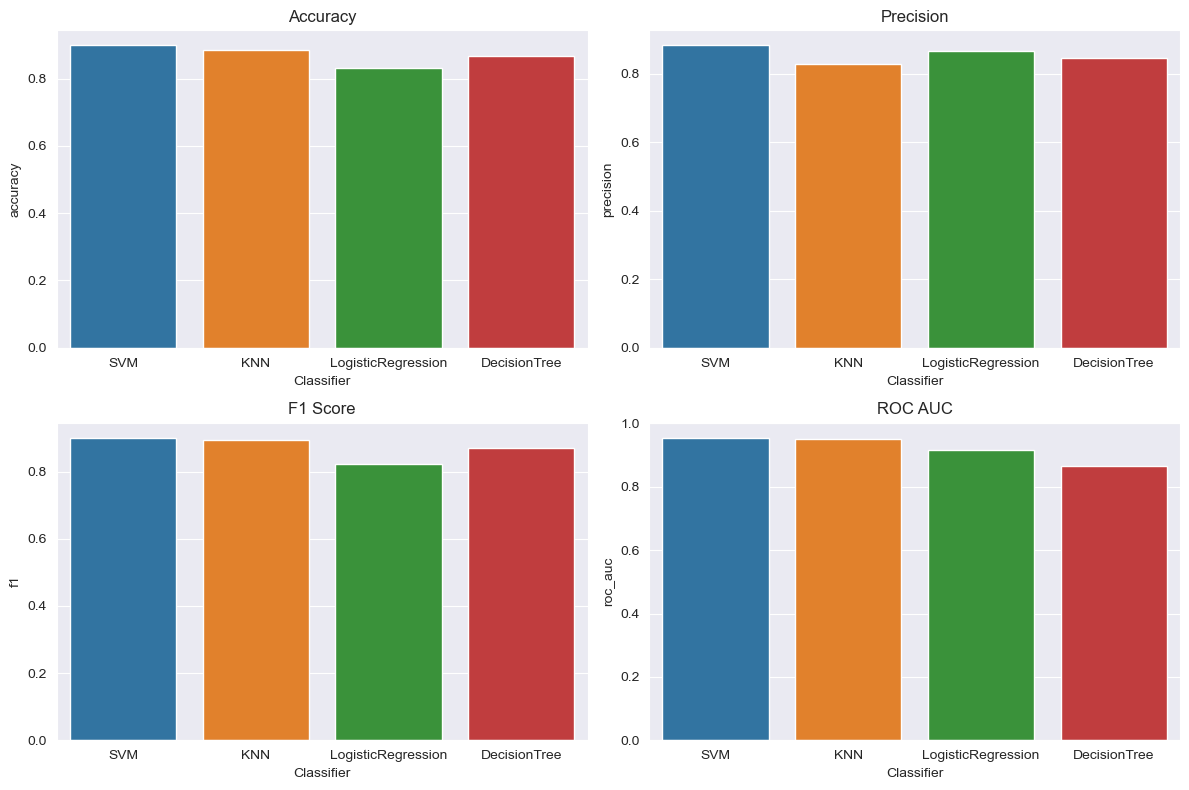

In [26]:
_, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.barplot(x='Classifier', y='accuracy', data=mean_scores_df, ax=axes[0, 0])
axes[0, 0].set_title('Accuracy')

sns.barplot(x='Classifier', y='precision', data=mean_scores_df, ax=axes[0, 1])
axes[0, 1].set_title('Precision')

sns.barplot(x='Classifier', y='f1', data=mean_scores_df, ax=axes[1, 0])
axes[1, 0].set_title('F1 Score')

sns.barplot(x='Classifier', y='roc_auc', data=mean_scores_df, ax=axes[1, 1])
axes[1, 1].set_title('ROC AUC')
plt.tight_layout()
plt.show()

In [27]:
# best_params = {}
# for clf_name, clf in classifiers.items():
#     grid_search = GridSearchCV(clf, param_grids[clf_name], cv=5, scoring='accuracy',n_jobs = -1)
#     grid_search.fit(x_pca_optimal, y)
#     best_params[clf_name] = grid_search.best_estimator_
#     print(f"Best parameters for {clf_name}: {grid_search.best_params_}")
# 
# 
# # evaluate best classifier
# 
# scores = {'Classifier Name': [],'accuracy':[],'precision':[],'f1 score':[],'roc_auc':[]}
# 
# for clf_name, clf in best_params.items():
#     accuracy = cross_val_score(clf, x_pca_optimal, y, cv=5, scoring='accuracy').mean()
# 
#     precision = cross_val_score(clf, x_pca_optimal, y, cv=5, scoring='precision').mean()
# 
#     f1_score = cross_val_score(clf,x_pca_optimal, y, cv=5, scoring='f1').mean()
# 
#     roc_auc = cross_val_score(clf, x_pca_optimal, y, cv=5, scoring='roc_auc').mean()
# 
#     scores['Classifier Name'].append(clf_name)
#     scores['accuracy'].append(accuracy)
#     scores['precision'].append(precision)
#     scores['f1 score'].append(f1_score)
#     scores['roc_auc'].append(roc_auc)
# 
# #convert scores to pandas data frame
# scores_df = pd.DataFrame(scores)
# scores_df

## Test your Model and Report results

choose the best model from last section based on the evalutiona metrics and bar plots and after that train the best classifier based on train data and test it's performance on test data. With this, we can see how good the model is on unseen data.

- print `classification report` and plot `confusion matrix` based on your model's predictions and the real labels.

In [28]:
# import necessary Libraries

In [29]:
# train the best model again and evaluate it on test data
best_model_name = mean_scores_df.loc[mean_scores_df['f1'].idxmax()]
best_model_name = best_model_name['Classifier']
best_model = classifiers[best_model_name].set_params(**best_params[best_model_name])
print(f"The best model is {best_model_name}")

# best_model = best_params['SVM']

# Train
best_model.fit(x_train_smote, y_train_smote)

# Predict on the test data
y_pred = best_model.predict(x_test)
y_pred_smote = best_model.predict(x_test_smote)

The best model is SVM


In [30]:
# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()
print(classification_report(y_test_smote, y_pred_smote))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2084
           1       0.52      0.69      0.59       382

    accuracy                           0.85      2466
   macro avg       0.73      0.79      0.75      2466
weighted avg       0.87      0.85      0.86      2466


              precision    recall  f1-score   support

           0       0.79      0.88      0.83      2084
           1       0.87      0.76      0.81      2084

    accuracy                           0.82      4168
   macro avg       0.83      0.82      0.82      4168
weighted avg       0.83      0.82      0.82      4168


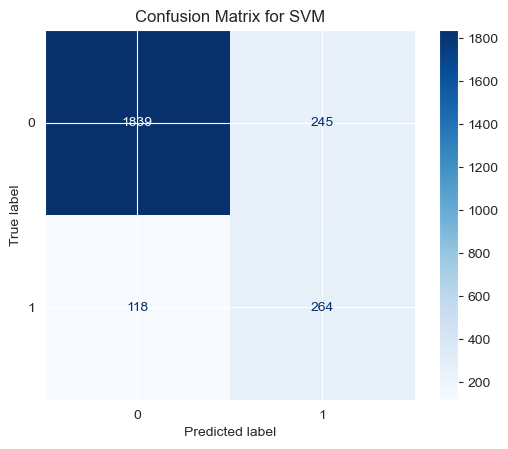

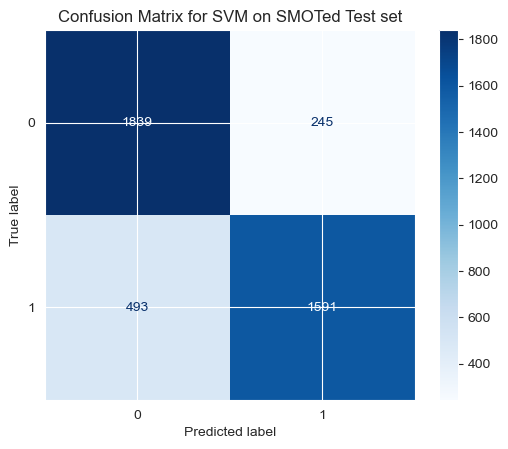

In [31]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

conf_matrix = confusion_matrix(y_test_smote, y_pred_smote)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {best_model_name} on SMOTed Test set')
plt.show()

## Clustering

When analyzing customer behavior, clustering algorithms can help identify groups of customers with similar characteristics. Two popular clustering methods are K-means and DBSCAN.  

### Using x_pca_optimal

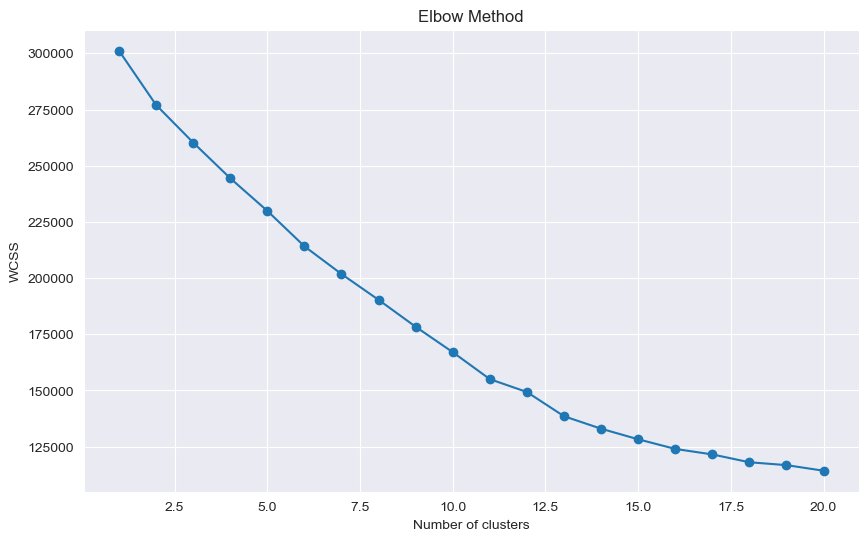

In [32]:
#Kmeans (Use a method for finding optimal number of clusters)
from sklearn.cluster import KMeans

# Use the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(x_pca_optimal)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

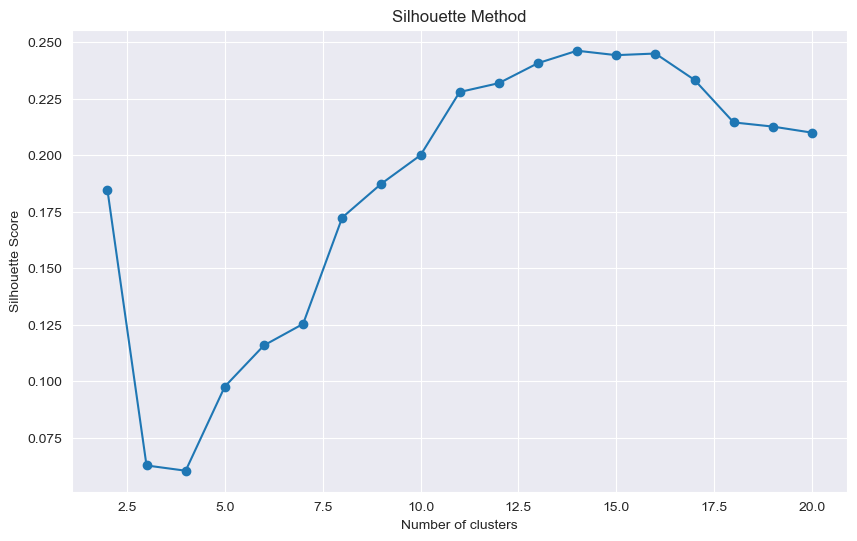

In [33]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(x_pca_optimal)
    score = silhouette_score(x_pca_optimal, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette method results
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [34]:
# Apply KMeans clustering with the optimal number of clusters
# optimal_clusters = 14  # according to elbow method and silhouette
optimal_clusters = np.argmax(silhouette_scores) + 2  # according to silhouette
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(x_pca_optimal)

# Add cluster labels to the original data
df_encoded['Cluster'] = y_kmeans

df_encoded

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend,Revenue,Cluster
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,1,0,0,6
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,1,0,0,6
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,1,0,0,6
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,0,1,0,0,6
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,1,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,1,1,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,1,0,0,0,1,1,0,11
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,1,0,0,0,1,1,0,11
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,1,0,0,0,1,0,0,11


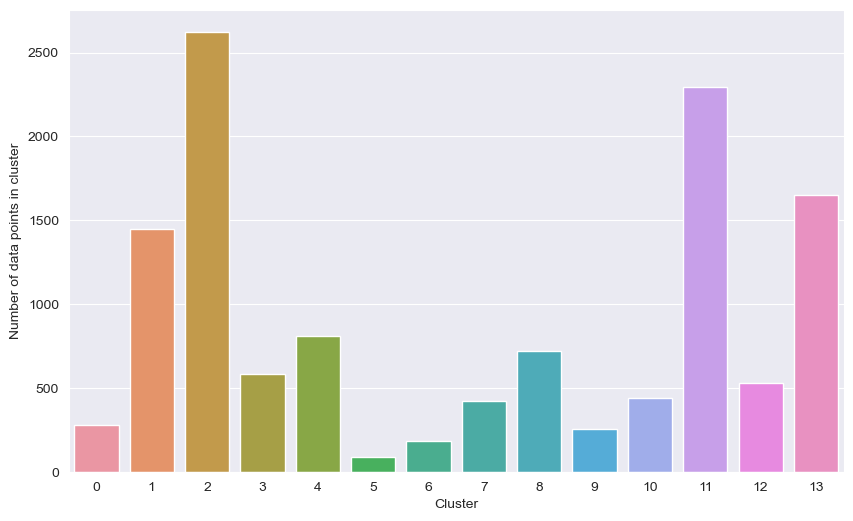

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y_kmeans)
plt.xlabel('Cluster')
plt.ylabel('Number of data points in cluster')
plt.show()

In [36]:
#DBSCAN
from sklearn.cluster import DBSCAN

# Function to run DBSCAN with different eps values and evaluate using silhouette score
def run_dbscan(x, min_samples):
    eps_values = np.arange(0.1, 5, 0.1)
    silhouette_scores = []
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(x)
        # Filter out noise for silhouette score
        if len(set(labels)) > 1:  # More than one cluster
            score = silhouette_score(x, labels)
            silhouette_scores.append((eps, score))
        else:
            silhouette_scores.append((eps, -1))
    return silhouette_scores

# Run DBSCAN with a range of eps values and a fixed min_samples
min_samples = 5
silhouette_scores = run_dbscan(x_pca_optimal, min_samples)

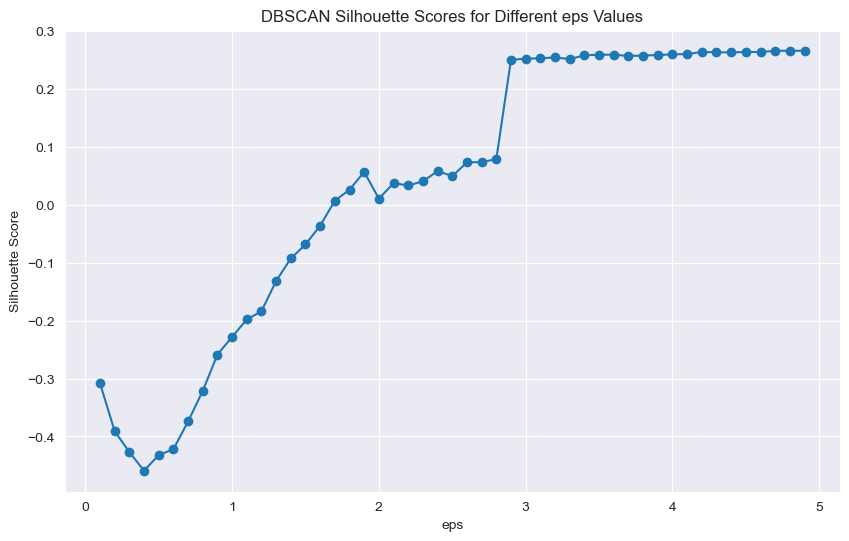

Optimal eps value: 4.8


In [37]:
# Plot the Silhouette method results
eps_values, scores = zip(*silhouette_scores)
plt.figure(figsize=(10, 6))
plt.plot(eps_values, scores, marker='o')
plt.title('DBSCAN Silhouette Scores for Different eps Values')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.show()

# Find the optimal eps value
optimal_eps = eps_values[np.argmax(scores)]
print(f'Optimal eps value: {optimal_eps}')

In [38]:
dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(x_pca_optimal)

# Add cluster labels to the original data
df_encoded['Cluster_dbscan'] = dbscan_labels

# Calculate the silhouette score for the optimal parameters
optimal_silhouette_score = silhouette_score(x_pca_optimal, dbscan_labels)
print(f'Silhouette Score for DBSCAN with eps={optimal_eps} and min_samples={min_samples}: {optimal_silhouette_score}')

df_encoded

Silhouette Score for DBSCAN with eps=4.8 and min_samples=5: 0.26593338024892577


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend,Revenue,Cluster,Cluster_dbscan
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,1,0,0,6,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,1,0,0,6,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,1,0,0,6,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,1,0,0,6,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,1,1,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,1,1,0,1,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,1,0,0,0,1,1,0,11,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,1,0,0,0,1,1,0,11,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,1,0,0,0,1,0,0,11,1


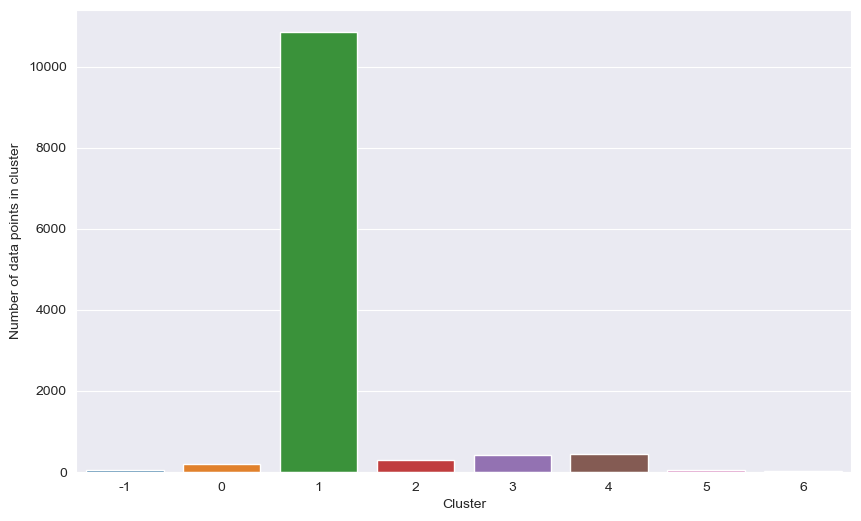

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x=dbscan_labels)
plt.xlabel('Cluster')
plt.ylabel('Number of data points in cluster')
plt.show()

### Using x_pca (PCA with 2 components)

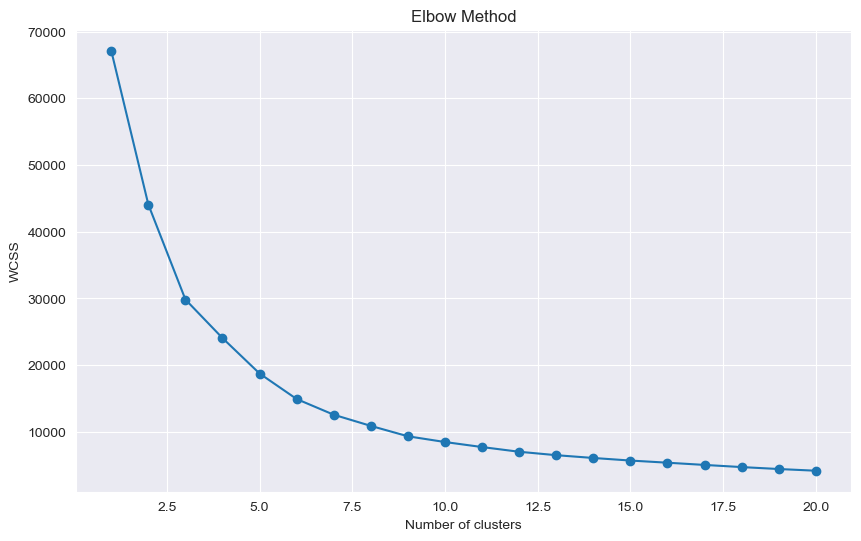

In [40]:
# K-Means
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

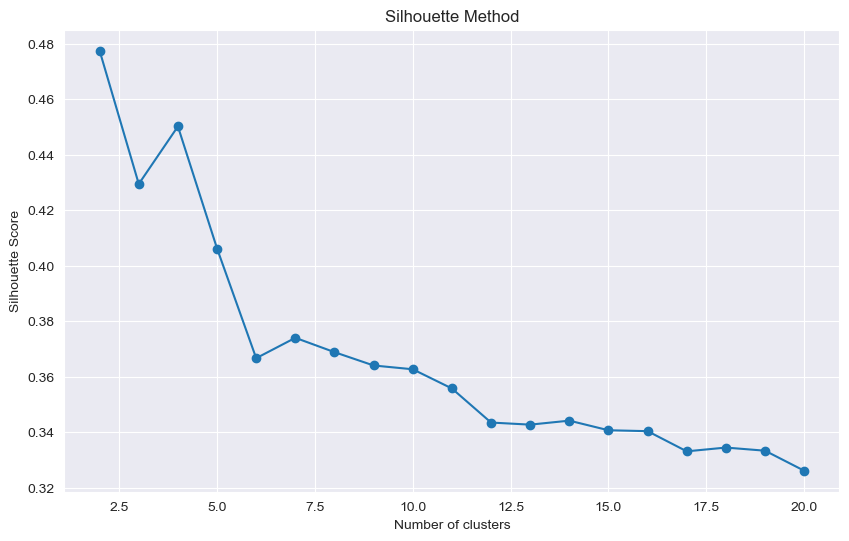

In [41]:
silhouette_scores = []
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(x_pca)
    score = silhouette_score(x_pca, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette method results
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [42]:
optimal_clusters = np.argmax(silhouette_scores) + 2  # according to silhouette
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(x_pca)

# Add cluster labels to the original data
df_encoded['Cluster_2d'] = y_kmeans

df_encoded

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend,Revenue,Cluster,Cluster_dbscan,Cluster_2d
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,1,0,0,6,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,1,0,0,6,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,1,0,0,6,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,1,0,0,6,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,1,1,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,1,1,0,1,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,1,0,0,0,1,1,0,11,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,1,0,0,0,1,1,0,11,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,1,0,0,0,1,0,0,11,1,0


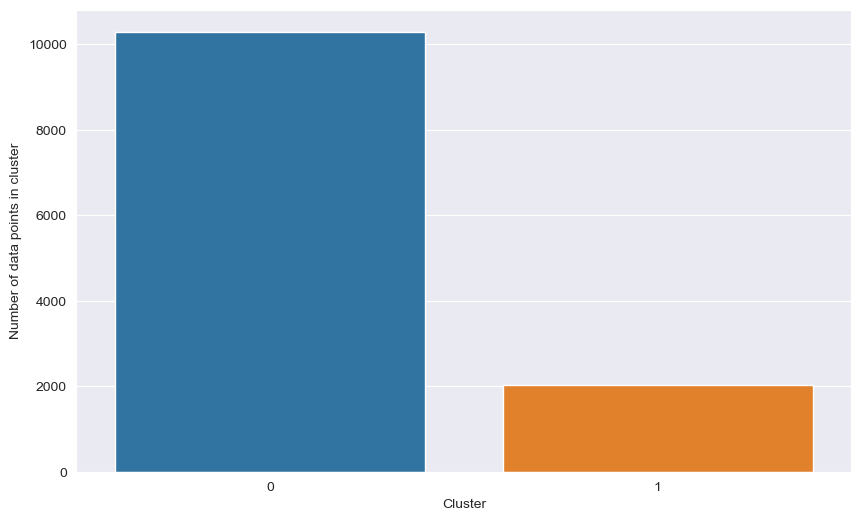

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y_kmeans)
plt.xlabel('Cluster')
plt.ylabel('Number of data points in cluster')
plt.show()

Silhouette Score for KMeans with n_clusters=2: 0.47748169399219126
[0 1]


C:\Users\Ali\AppData\Local\Temp\ipykernel_20132\1112745533.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_pca[y_kmeans == label, 0], x_pca[y_kmeans == label, 1], c=color, label=label_name, edgecolor='k', s=50)


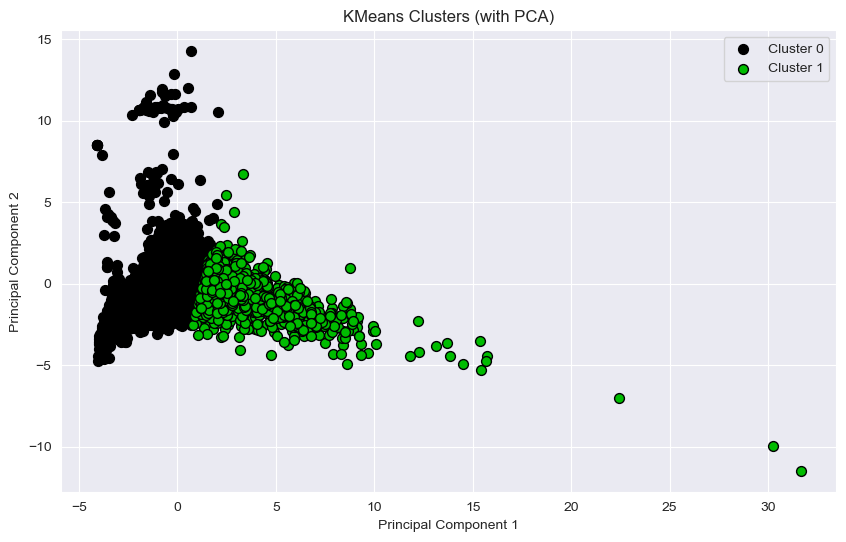

In [44]:
kmeans_silhouette_score = silhouette_score(x_pca, y_kmeans)
print(f'Silhouette Score for KMeans with n_clusters={optimal_clusters}: {kmeans_silhouette_score}')

# Plot the clusters
plt.figure(figsize=(10, 6))
unique_labels = np.unique(y_kmeans)
print(unique_labels)
for label in unique_labels:
    color = plt.cm.nipy_spectral(float(label) / len(unique_labels))
    label_name = f'Cluster {label}'
    plt.scatter(x_pca[y_kmeans == label, 0], x_pca[y_kmeans == label, 1], c=color, label=label_name, edgecolor='k', s=50)

plt.title('KMeans Clusters (with PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

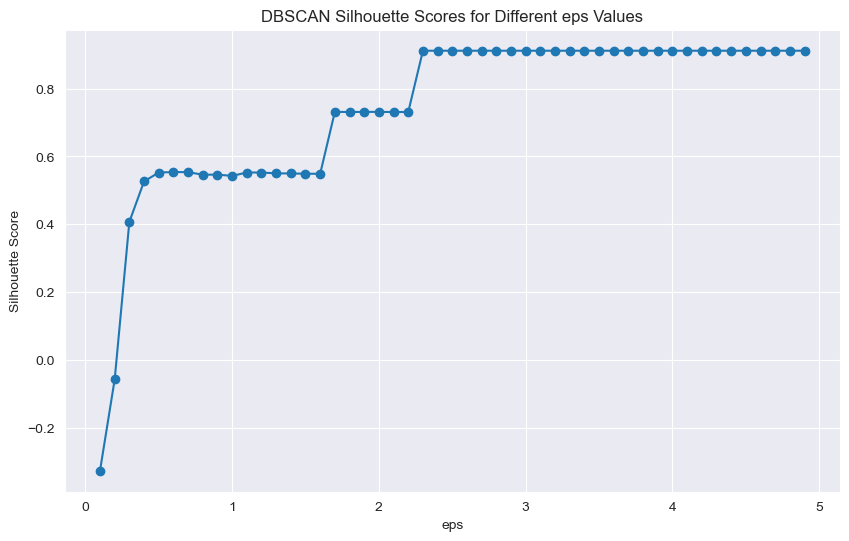

Optimal eps value: 2.3000000000000003


In [45]:
# DBSCAN
min_samples = 5
silhouette_scores = run_dbscan(x_pca, min_samples)

# Plot the Silhouette method results
eps_values, scores = zip(*silhouette_scores)
plt.figure(figsize=(10, 6))
plt.plot(eps_values, scores, marker='o')
plt.title('DBSCAN Silhouette Scores for Different eps Values')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.show()

# Find the optimal eps value
optimal_eps = eps_values[np.argmax(scores)]
print(f'Optimal eps value: {optimal_eps}')

Silhouette Score for DBSCAN with eps=2.3000000000000003 and min_samples=5: 0.911923707366159


C:\Users\Ali\AppData\Local\Temp\ipykernel_20132\395277088.py:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_pca[dbscan_labels == label, 0], x_pca[dbscan_labels == label, 1], c=color, label=label_name, edgecolor='k', s=50)


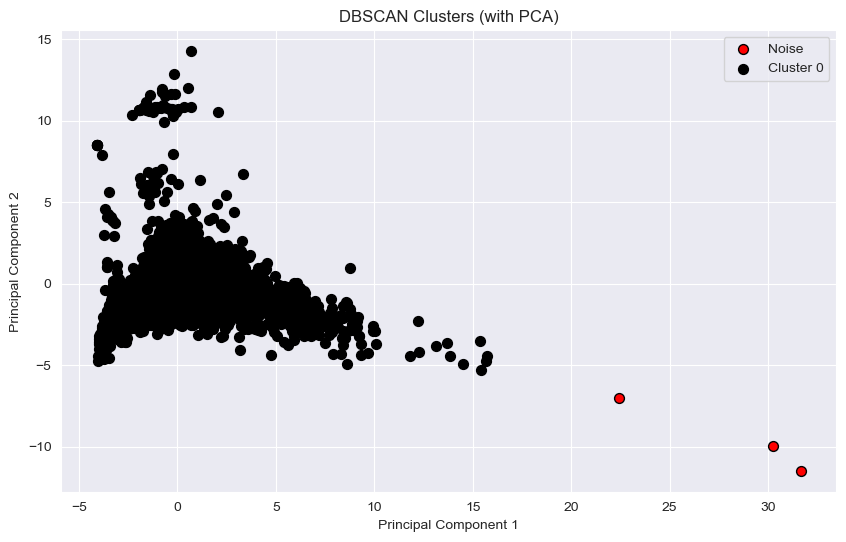

In [46]:
dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(x_pca)

# Add cluster labels to the original data
df_encoded['Cluster_dbscan_2d'] = dbscan_labels


# Calculate the silhouette score for the optimal parameters
optimal_silhouette_score = silhouette_score(x_pca, dbscan_labels)
print(f'Silhouette Score for DBSCAN with eps={optimal_eps} and min_samples={min_samples}: {optimal_silhouette_score}')

# Plot the clusters
plt.figure(figsize=(10, 6))
unique_labels = np.unique(dbscan_labels)
for label in unique_labels:
    if label == -1:
        # Black is used for noise.
        color = 'red'
        label_name = 'Noise'
    else:
        color = plt.cm.nipy_spectral(float(label) / len(unique_labels))
        label_name = f'Cluster {label}'
    plt.scatter(x_pca[dbscan_labels == label, 0], x_pca[dbscan_labels == label, 1], c=color, label=label_name, edgecolor='k', s=50)

plt.title('DBSCAN Clusters (with PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

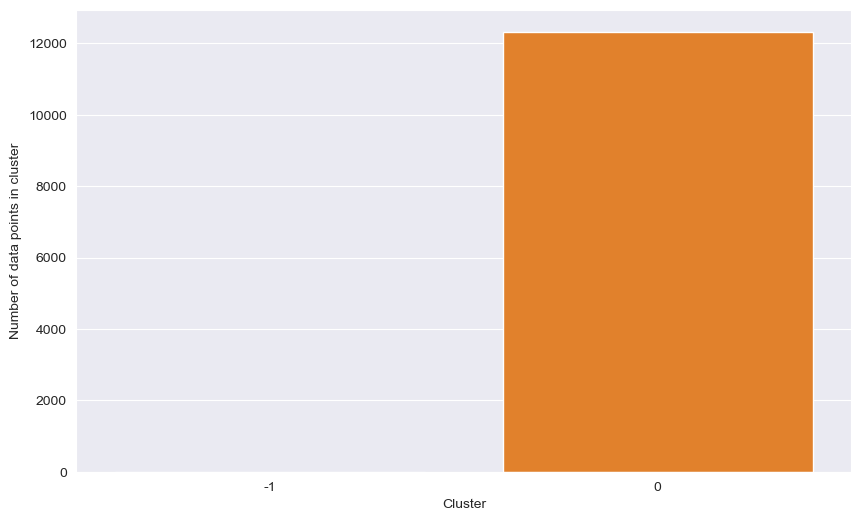

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(x=dbscan_labels)
plt.xlabel('Cluster')
plt.ylabel('Number of data points in cluster')
plt.show()